# Fill in the MyStrategy Class below to specify your strategy logic

In [1]:

from strategy import *
from BaseStrategy import BaseStrategy

class MyStrategy(BaseStrategy):
    def __init__(self, strategy_actions):
        self.small_window = 40
        self.big_window = 100
        self.small_sum = 0.0
        self.big_sum = 0.0
        self.stock_size = 0
        self.revenue = 0.0
        self.capital = 0.0
        self.trade_times = 0
        self.inc = 0
        self.small_set = []
        self.big_set = []

        super().__init__(strategy_actions)

    def OnResetStrategyState(self):
        pass
        
    # Set flags before the strategy is started
    def SetFlags(self):
        pass

    def OnTrade(self, msg):

        instrument = msg.instrument(); 
        mid_price = (instrument.top_quote().ask() + instrument.top_quote().bid()) / 2
        
        self.small_sum += mid_price
        self.big_sum += mid_price
            
        #iterating over symbols in python
        for symbol in self.symbols(): 
            print(symbol)
        
        self.small_set.append(mid_price)
        self.big_set.append(mid_price)

        if len(self.small_set) > self.small_window: 
            self.small_sum -= self.small_set.pop()
       
        if len(self.big_set) > self.big_window: 
            self.big_sum -= self.big_set.pop()

        small_average = self.small_sum / len(self.small_set)
        big_average = self.big_sum / len(self.big_set)

        if small_average > big_average:
            self.SendOrder(instrument, 100)    
            self.stock_size += 100
            self.revenue -= instrument.top_quote().ask() * 100
            self.trade_times += 1 

        elif small_average < big_average and self.stock_size > 0:
            self.SendOrder(instrument, -100)    
            self.stock_size -= 100
            self.revenue += instrument.top_quote().bid() * 100
            self.trade_times += 1 
        
        self.capital = self.stock_size * instrument.top_quote().bid() + self.revenue

        print("Capital = " + str(self.capital) + " size = " + str(self.stock_size) + " trade times = " + str(self.trade_times))
        
        pass


    def OnTopQuote(self, msg):
        pass
       
    def OnQuote(self, msg): 
        pass
    
    def OnBar(self, msg): 
        pass

    def OnDepth(self, msg):
        pass
    
    def OnResetStrategyState(self): 
        pass

    def OnOrderUpdate(self, msg): 
        pass
    
    def OnResetStrategyState(self): 
        pass

    def RegisterForStrategyEvents(self, eventRegister, currDate):
        pass
    
    def SendOrder(self, instrument, trade_size): 
        price = 0
        action = ""

        if trade_size > 0: # buy 
            price = instrument.top_quote().ask()
            action = "buy"
        else: # sell
            price = instrument.top_quote().bid()
            action = "sell"
        
        params = OrderParams(instrument, abs(trade_size), price, MARKET_CENTER_ID_IEX, (ORDER_SIDE_BUY if trade_size > 0 else ORDER_SIDE_SELL), ORDER_TIF_DAY, ORDER_TYPE_LIMIT)

        print("SendTradeOrder(): about to send new order for size " + str(trade_size) + " at $" + str(price) + " to " + str(action) + " " + instrument.symbol())
        
        self.trade_actions().SendNewOrder(params)
        pass

    def OnNews(self, msg):
        pass  



ModuleNotFoundError: No module named 'strategy'

# Run the cell below to export your strategy and run a backtest

In [1]:
# Run Script
!./runstrat.sh

/Users/rishabrao/opt/anaconda3/lib/python3.9/site-packages/traitlets/traitlets.py:2562: FutureWarning: --TagRemovePreprocessor.remove_cell_tags={"remove"} for containers is deprecated in traitlets 5.0. You can pass `--TagRemovePreprocessor.remove_cell_tags item` ... multiple times to add items to a list.
  warn(
[NbConvertApp] Converting notebook your_strategy.ipynb to python
[NbConvertApp] Writing 3404 bytes to ../MyStrategy.py
Great! You properly cloned the repo using --recursive!
You already have your ssh key! great!
Great! You already downloaded the Strategy Studio SDK
Great! You already downloaded the Strategy Studio Backtesting Engine!
Great! You already placed your license.txt file in this folder!
Compressing PybindStrategy
All dependencies are met! Launching VM!!
Bringing up VM
declare -x VAGRANT_CHECKPOINT_DISABLE="1"
declare -x VAGRANT_HOME="/Users/rishabrao/Dev/group_02_project/strategystudioubuntu2004/vagrant_home"
Bringing machine 'default' up with 'virtualbox' provider...

Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.87 to buy AAPL
Capital = -421.0 size = 100 trade times = 1
AAPL
SendTradeOrder(): about to send new order for size 100 at $153.82 to buy AAPL
Capital = -189.0 size = 200 trade times = 2
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.9 to buy AAPL
Capital = -198.0 size = 300 trade times = 3
AAPL
SendTradeOrder(): about to send new order for size -100 at $151.87 to sell AAPL
Capital = -198.0 size = 200 trade times = 4
AAPL
SendTradeOrder(): about to send new order for size -100 at $151.87 to sell AAPL
Capital = -198.0 size = 100 trade times = 5
AAPL
SendTradeOrder(): about to send new order for size -100 at $151.87 to sell AAPL
Capital = -198.0 size = 0 trade times = 6
AAPL
Capital = -198.0 size = 0 trade times = 6
AAPL
SendTradeOrd

Capital = -5332.0 size = 8100 trade times = 87
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.61 to buy AAPL
Capital = -5334.0 size = 8200 trade times = 88
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.61 to buy AAPL
Capital = -37955.0 size = 8300 trade times = 89
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.74 to buy AAPL
Capital = -5351.0 size = 8400 trade times = 90
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.74 to buy AAPL
Capital = -38771.0 size = 8500 trade times = 91
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.55 to buy AAPL
Capital = -39160.0 size = 8600 trade times = 92
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.55 to buy AAPL
Capital = -39549.0 size = 8700 trade times = 93
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.55 to buy AAPL
Capital = -39938.0 size = 8800 trade times = 94
AAPL
SendTradeOrder(): about to send n

Capital = -2803.0 size = 14600 trade times = 152
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.95 to buy AAPL
Capital = -2512.0 size = 14700 trade times = 153
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.98 to buy AAPL
Capital = -2516.0 size = 14800 trade times = 154
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.04 to buy AAPL
Capital = -1632.0 size = 14900 trade times = 155
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.04 to buy AAPL
Capital = -1636.0 size = 15000 trade times = 156
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.97 to buy AAPL
Capital = -67167.0 size = 15100 trade times = 157
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.9 to buy AAPL
Capital = -67591.0 size = 15200 trade times = 158
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.88 to buy AAPL
Capital = -3906.0 size = 15300 trade times = 159
AAPL
SendTradeOrder(): abo

Capital = -5628.0 size = 22700 trade times = 233
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.82 to buy AAPL
Capital = -4950.0 size = 22800 trade times = 234
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.8 to buy AAPL
Capital = -5408.999999999534 size = 22900 trade times = 235
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.8 to buy AAPL
Capital = -5411.999999999534 size = 23000 trade times = 236
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.8 to buy AAPL
Capital = -5414.999999999534 size = 23100 trade times = 237
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.8 to buy AAPL
Capital = -5650.0 size = 23200 trade times = 238
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.8 to buy AAPL
Capital = -5654.0 size = 23300 trade times = 239
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.8 to buy AAPL
Capital = -5658.0 size = 23400 trade times = 240


AAPL
SendTradeOrder(): about to send new order for size 100 at $151.89 to buy AAPL
Capital = -2195.0 size = 30700 trade times = 313
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.9 to buy AAPL
Capital = -1890.0 size = 30800 trade times = 314
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.89 to buy AAPL
Capital = -2200.0 size = 30900 trade times = 315
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.89 to buy AAPL
Capital = -2202.0 size = 31000 trade times = 316
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.89 to buy AAPL
Capital = -2204.0 size = 31100 trade times = 317
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.89 to buy AAPL
Capital = -2206.0 size = 31200 trade times = 318
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.9 to buy AAPL
Capital = -2835.0 size = 31300 trade times = 319
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.9 to buy A

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.8 to buy AAPL
Capital = -6488.0 size = 37500 trade times = 381
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.82 to buy AAPL
Capital = -5366.0 size = 37600 trade times = 382
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.79 to buy AAPL
Capital = -5743.0 size = 37700 trade times = 383
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.82 to buy AAPL
Capital = -4991.0 size = 37800 trade times = 384
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.81 to buy AAPL
Capital = -5750.0 size = 37900 trade times = 385
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.83 to buy AAPL
Capital = -4615.0 size = 38000 trade times = 386
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.83 to buy AAPL
Capital = -4617.0 size = 38100 trade times = 387
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.78 to buy

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.78 to buy AAPL
Capital = -7116.0 size = 44200 trade times = 448
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.78 to buy AAPL
Capital = -7562.0 size = 44300 trade times = 449
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.8 to buy AAPL
Capital = -6236.0 size = 44400 trade times = 450
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.8 to buy AAPL
Capital = -7574.0 size = 44500 trade times = 451
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.79 to buy AAPL
Capital = -6687.0 size = 44600 trade times = 452
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.79 to buy AAPL
Capital = -6690.0 size = 44700 trade times = 453
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.79 to buy AAPL
Capital = -6693.0 size = 44800 trade times = 454
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.75 to buy 

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.66 to buy AAPL
Capital = -13098.0 size = 52500 trade times = 531
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.68 to buy AAPL
Capital = -12577.000000000931 size = 52600 trade times = 532
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.65 to buy AAPL
Capital = -13105.0 size = 52700 trade times = 533
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.66 to buy AAPL
Capital = -13636.0 size = 52800 trade times = 534
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.64 to buy AAPL
Capital = -14696.0 size = 52900 trade times = 535
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.64 to buy AAPL
Capital = -14169.999999999069 size = 53000 trade times = 536
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.66 to buy AAPL
Capital = -12582.000000000931 size = 53100 trade times = 537
AAPL
SendTradeOrder(): about to send

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.36 to buy AAPL
Capital = -29763.0 size = 59200 trade times = 598
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.37 to buy AAPL
Capital = -28581.0 size = 59300 trade times = 599
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.38 to buy AAPL
Capital = -29178.0 size = 59400 trade times = 600
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.38 to buy AAPL
Capital = -29182.0 size = 59500 trade times = 601
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.4 to buy AAPL
Capital = -27996.0 size = 59600 trade times = 602
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.41 to buy AAPL
Capital = -26807.0 size = 59700 trade times = 603
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.42 to buy AAPL
Capital = -26811.0 size = 59800 trade times = 604
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.48

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.54 to buy AAPL
Capital = -18935.0 size = 67400 trade times = 680
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.55 to buy AAPL
Capital = -18263.0 size = 67500 trade times = 681
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.55 to buy AAPL
Capital = -279877.0 size = 67600 trade times = 682
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.57 to buy AAPL
Capital = -280268.0 size = 67700 trade times = 683
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.6 to buy AAPL
Capital = -280662.0 size = 67800 trade times = 684
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.65 to buy AAPL
Capital = -281061.0 size = 67900 trade times = 685
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.61 to buy AAPL
Capital = -281456.0 size = 68000 trade times = 686
AAPL
SendTradeOrder(): about to send new order for size 100 at $1

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.44 to buy AAPL
Capital = -27406.000000001863 size = 75100 trade times = 757
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.52 to buy AAPL
Capital = -29672.000000001863 size = 75200 trade times = 758
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.52 to buy AAPL
Capital = -29685.000000001863 size = 75300 trade times = 759
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -29702.000000001863 size = 75400 trade times = 760
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -18394.0 size = 75500 trade times = 761
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -29736.000000001863 size = 75600 trade times = 762
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -29753.000000001863 size = 75700 trade times = 763
AAP

AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -21380.0 size = 83700 trade times = 843
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -21438.0 size = 83800 trade times = 844
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.54 to buy AAPL
Capital = -21440.0 size = 83900 trade times = 845
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -24018.0 size = 84000 trade times = 846
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.52 to buy AAPL
Capital = -24021.0 size = 84100 trade times = 847
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.5 to buy AAPL
Capital = -24022.0 size = 84200 trade times = 848
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.49 to buy AAPL
Capital = -25708.0 size = 84300 trade times = 849
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.49 to

SendTradeOrder(): about to send new order for size 100 at $151.37 to buy AAPL
Capital = -43669.99999999814 size = 91400 trade times = 920
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.38 to buy AAPL
Capital = -34531.0 size = 91500 trade times = 921
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.36 to buy AAPL
Capital = -43689.99999999814 size = 91600 trade times = 922
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.35 to buy AAPL
Capital = -43697.99999999814 size = 91700 trade times = 923
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.35 to buy AAPL
Capital = -43705.99999999814 size = 91800 trade times = 924
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.35 to buy AAPL
Capital = -43713.99999999814 size = 91900 trade times = 925
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.35 to buy AAPL
Capital = -43721.99999999814 size = 92000 trade times = 926
AAPL
SendTrade

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.53 to buy AAPL
Capital = -20383.999999998137 size = 99300 trade times = 999
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.52 to buy AAPL
Capital = -404068.0 size = 99400 trade times = 1000
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.52 to buy AAPL
Capital = -404454.0 size = 99500 trade times = 1001
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.54 to buy AAPL
Capital = -404842.0 size = 99600 trade times = 1002
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.54 to buy AAPL
Capital = -405230.0 size = 99700 trade times = 1003
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.55 to buy AAPL
Capital = -405619.0 size = 99800 trade times = 1004
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.57 to buy AAPL
Capital = -19397.0 size = 99900 trade times = 1005
AAPL
SendTradeOrder(): about to send new order 

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -25507.0 size = 108300 trade times = 1089
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.58 to buy AAPL
Capital = -17927.0 size = 108400 trade times = 1090
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.58 to buy AAPL
Capital = -17928.0 size = 108500 trade times = 1091
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.63 to buy AAPL
Capital = -25536.0 size = 108600 trade times = 1092
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.63 to buy AAPL
Capital = -25549.0 size = 108700 trade times = 1093
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.69 to buy AAPL
Capital = -7072.000000001863 size = 108800 trade times = 1094
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.7 to buy AAPL
Capital = -5986.0 size = 108900 trade times = 1095
AAPL
SendTradeOrder(): about to send new order 

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.52 to buy AAPL
Capital = -27367.0 size = 115400 trade times = 1160
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.5 to buy AAPL
Capital = -32086.0 size = 115500 trade times = 1161
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.45 to buy AAPL
Capital = -35552.0 size = 115600 trade times = 1162
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.5 to buy AAPL
Capital = -29773.0 size = 115700 trade times = 1163
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -27464.0 size = 115800 trade times = 1164
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -22833.0 size = 115900 trade times = 1165
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.63 to buy AAPL
Capital = -80841.0 size = 116000 trade times = 1166
AAPL
SendTradeOrder(): about to send new order for size 1

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.5 to buy AAPL
Capital = -32423.0 size = 123000 trade times = 1236
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.5 to buy AAPL
Capital = -32425.0 size = 123100 trade times = 1237
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.5 to buy AAPL
Capital = -32427.0 size = 123200 trade times = 1238
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.52 to buy AAPL
Capital = -54625.0 size = 123300 trade times = 1239
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -27607.0 size = 123400 trade times = 1240
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.54 to buy AAPL
Capital = -54779.0 size = 123500 trade times = 1241
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.53 to buy AAPL
Capital = -54802.0 size = 123600 trade times = 1242
AAPL
SendTradeOrder(): about to send new order for size 100

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.58 to buy AAPL
Capital = -26184.0 size = 130300 trade times = 1309
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -27593.0 size = 130400 trade times = 1310
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -27699.0 size = 130500 trade times = 1311
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -27701.0 size = 130600 trade times = 1312
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -35545.0 size = 130700 trade times = 1313
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.55 to buy AAPL
Capital = -29012.0 size = 130800 trade times = 1314
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -35560.0 size = 130900 trade times = 1315
AAPL
SendTradeOrder(): about to send new order for size 1

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.37 to buy AAPL
Capital = -52644.999999996275 size = 138500 trade times = 1391
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.36 to buy AAPL
Capital = -54031.0 size = 138600 trade times = 1392
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.37 to buy AAPL
Capital = -59581.0 size = 138700 trade times = 1393
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.37 to buy AAPL
Capital = -59587.0 size = 138800 trade times = 1394
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.38 to buy AAPL
Capital = -51260.0 size = 138900 trade times = 1395
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.38 to buy AAPL
Capital = -51261.0 size = 139000 trade times = 1396
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.39 to buy AAPL
Capital = -52653.999999996275 size = 139100 trade times = 1397
AAPL
SendTradeOrder(): about to s

AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -100270.0 size = 147300 trade times = 1479
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -100375.0 size = 147400 trade times = 1480
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -76880.0 size = 147500 trade times = 1481
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -75493.0 size = 147600 trade times = 1482
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -74104.0 size = 147700 trade times = 1483
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -74191.0 size = 147800 trade times = 1484
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.24 to buy AAPL
Capital = -77150.0 size = 147900 trade times = 1485
AAPL
SendTradeOrder(): about to send new order for size 100

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.12 to buy AAPL
Capital = -145786.0 size = 156300 trade times = 1569
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.12 to buy AAPL
Capital = -145819.0 size = 156400 trade times = 1570
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -95919.99999999627 size = 156500 trade times = 1571
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -146031.0 size = 156600 trade times = 1572
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -146062.0 size = 156700 trade times = 1573
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -99203.0 size = 156800 trade times = 1574
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -88371.0 size = 156900 trade times = 1575
AAPL
SendTradeOrder(): about to send new order

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.15 to buy AAPL
Capital = -94316.0 size = 165400 trade times = 1660
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.15 to buy AAPL
Capital = -94318.0 size = 165500 trade times = 1661
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.15 to buy AAPL
Capital = -115848.0 size = 165600 trade times = 1662
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.13 to buy AAPL
Capital = -95977.0 size = 165700 trade times = 1663
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.12 to buy AAPL
Capital = -99293.0 size = 165800 trade times = 1664
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.08 to buy AAPL
Capital = -115881.0 size = 165900 trade times = 1665
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.08 to buy AAPL
Capital = -115889.0 size = 166000 trade times = 1666
AAPL
SendTradeOrder(): about to send new order for s

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.91 to buy AAPL
Capital = -133444.0 size = 171400 trade times = 1720
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.91 to buy AAPL
Capital = -133445.0 size = 171500 trade times = 1721
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.91 to buy AAPL
Capital = -152322.0 size = 171600 trade times = 1722
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.91 to buy AAPL
Capital = -152334.0 size = 171700 trade times = 1723
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.93 to buy AAPL
Capital = -130014.00000000373 size = 171800 trade times = 1724
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.93 to buy AAPL
Capital = -130015.00000000373 size = 171900 trade times = 1725
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.94 to buy AAPL
Capital = -130017.00000000373 size = 172000 trade times = 1726
AAPL
SendTradeOrde

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.94 to buy AAPL
Capital = -128793.0 size = 179400 trade times = 1800
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.94 to buy AAPL
Capital = -128794.0 size = 179500 trade times = 1801
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.94 to buy AAPL
Capital = -128795.0 size = 179600 trade times = 1802
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -130595.00000000373 size = 179700 trade times = 1803
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -130599.00000000373 size = 179800 trade times = 1804
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -130603.00000000373 size = 179900 trade times = 1805
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -125207.00000000373 size = 180000 trade times = 1806
AAPL
Sen

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -116175.0 size = 186700 trade times = 1873
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -114313.0 size = 186800 trade times = 1874
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.03 to buy AAPL
Capital = -112445.99999999627 size = 186900 trade times = 1875
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.02 to buy AAPL
Capital = -114316.0 size = 187000 trade times = 1876
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -116192.0 size = 187100 trade times = 1877
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.03 to buy AAPL
Capital = -114323.0 size = 187200 trade times = 1878
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.03 to buy AAPL
Capital = -114325.0 size = 187300 trade times = 1879
AAPL
SendTradeOrder(): about to send n

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -91875.0 size = 195300 trade times = 1959
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -89938.00000000373 size = 195400 trade times = 1960
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -89954.00000000373 size = 195500 trade times = 1961
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -97794.0 size = 195600 trade times = 1962
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -103685.0 size = 195700 trade times = 1963
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -103708.0 size = 195800 trade times = 1964
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -103731.0 size = 195900 trade times = 1965
AAPL
SendTradeOrder(): about to send ne

Capital = -112276.0 size = 204000 trade times = 2046
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.08 to buy AAPL
Capital = -112280.0 size = 204100 trade times = 2047
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.08 to buy AAPL
Capital = -159250.0 size = 204200 trade times = 2048
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.08 to buy AAPL
Capital = -159277.0 size = 204300 trade times = 2049
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.01 to buy AAPL
Capital = -159297.0 size = 204400 trade times = 2050
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.01 to buy AAPL
Capital = -159317.0 size = 204500 trade times = 2051
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.08 to buy AAPL
Capital = -116377.99999999627 size = 204600 trade times = 2052
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.08 to buy AAPL
Capital = -116383.99999999627 size = 2

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.18 to buy AAPL
Capital = -88156.00000000373 size = 212100 trade times = 2127
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.18 to buy AAPL
Capital = -164549.0 size = 212200 trade times = 2128
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.18 to buy AAPL
Capital = -164586.0 size = 212300 trade times = 2129
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.18 to buy AAPL
Capital = -164623.0 size = 212400 trade times = 2130
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.18 to buy AAPL
Capital = -164660.0 size = 212500 trade times = 2131
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -88303.00000000373 size = 212600 trade times = 2132
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -165018.0 size = 212700 trade times = 2133
AAPL
SendTradeOrder(): about to 

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.25 to buy AAPL
Capital = -77113.99999999627 size = 220600 trade times = 2212
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.25 to buy AAPL
Capital = -79322.00000000373 size = 220700 trade times = 2213
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.24 to buy AAPL
Capital = -172059.0 size = 220800 trade times = 2214
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.24 to buy AAPL
Capital = -81533.0 size = 220900 trade times = 2215
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -81671.0 size = 221000 trade times = 2216
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -79598.00000000373 size = 221100 trade times = 2217
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.2 to buy AAPL
Capital = -88443.0 size = 221200 trade times = 2218
AAPL
SendTradeOrder(): abou

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -113484.0 size = 226800 trade times = 2274
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -113485.0 size = 226900 trade times = 2275
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.09 to buy AAPL
Capital = -115755.0 size = 227000 trade times = 2276
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.09 to buy AAPL
Capital = -115756.0 size = 227100 trade times = 2277
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.07 to buy AAPL
Capital = -122571.0 size = 227200 trade times = 2278
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.07 to buy AAPL
Capital = -124846.0 size = 227300 trade times = 2279
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.05 to buy AAPL
Capital = -124847.0 size = 227400 trade times = 2280
AAPL
SendTradeOrder(): about to send new order for

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.04 to buy AAPL
Capital = -129437.0 size = 232900 trade times = 2335
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.04 to buy AAPL
Capital = -129438.0 size = 233000 trade times = 2336
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.04 to buy AAPL
Capital = -129439.0 size = 233100 trade times = 2337
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -180740.0 size = 233200 trade times = 2338
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -180757.0 size = 233300 trade times = 2339
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.02 to buy AAPL
Capital = -180778.0 size = 233400 trade times = 2340
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.02 to buy AAPL
Capital = -180799.0 size = 233500 trade times = 2341
AAPL
SendTradeOrder(): about to send new order fo

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -125394.0 size = 239000 trade times = 2396
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -125395.0 size = 239100 trade times = 2397
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.07 to buy AAPL
Capital = -182805.0 size = 239200 trade times = 2398
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -182834.0 size = 239300 trade times = 2399
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -182863.0 size = 239400 trade times = 2400
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -182888.0 size = 239500 trade times = 2401
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -182913.0 size = 239600 trade times = 2402
AAPL
SendTradeOrder(): about to send new order for

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -128264.0 size = 246000 trade times = 2466
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -128266.0 size = 246100 trade times = 2467
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -128268.0 size = 246200 trade times = 2468
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.04 to buy AAPL
Capital = -184917.0 size = 246300 trade times = 2469
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.04 to buy AAPL
Capital = -184940.0 size = 246400 trade times = 2470
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.05 to buy AAPL
Capital = -184964.0 size = 246500 trade times = 2471
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -123493.0 size = 246600 trade times = 2472
AAPL
SendTradeOrder(): about to send new order fo

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -151257.0 size = 254000 trade times = 2546
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -151259.0 size = 254100 trade times = 2547
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.99 to buy AAPL
Capital = -148720.0 size = 254200 trade times = 2548
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.99 to buy AAPL
Capital = -148722.0 size = 254300 trade times = 2549
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -143637.0 size = 254400 trade times = 2550
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.01 to buy AAPL
Capital = -141094.0 size = 254500 trade times = 2551
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -153824.0 size = 254600 trade times = 2552
AAPL
SendTradeOrder(): about to send new order for

SendTradeOrder(): about to send new order for size 100 at $151.01 to buy AAPL
Capital = -146361.0 size = 260500 trade times = 2611
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.01 to buy AAPL
Capital = -146363.0 size = 260600 trade times = 2612
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.05 to buy AAPL
Capital = -143762.0 size = 260700 trade times = 2613
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.05 to buy AAPL
Capital = -143767.0 size = 260800 trade times = 2614
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.05 to buy AAPL
Capital = -146381.0 size = 260900 trade times = 2615
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.05 to buy AAPL
Capital = -141167.0 size = 261000 trade times = 2616
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.05 to buy AAPL
Capital = -141171.0 size = 261100 trade times = 2617
AAPL
SendTradeOrder(): about to send new order for si

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.97 to buy AAPL
Capital = -186765.0 size = 268700 trade times = 2693
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.97 to buy AAPL
Capital = -157209.0 size = 268800 trade times = 2694
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -159900.0 size = 268900 trade times = 2695
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -159905.0 size = 269000 trade times = 2696
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -159910.0 size = 269100 trade times = 2697
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -159911.0 size = 269200 trade times = 2698
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -197618.0 size = 269300 trade times = 2699
AAPL
SendTradeOrder(): about to send new order for 

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.94 to buy AAPL
Capital = -168438.0 size = 275600 trade times = 2762
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.92 to buy AAPL
Capital = -201521.0 size = 275700 trade times = 2763
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.92 to buy AAPL
Capital = -201532.0 size = 275800 trade times = 2764
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.93 to buy AAPL
Capital = -201544.0 size = 275900 trade times = 2765
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -160161.0 size = 276000 trade times = 2766
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -162924.0 size = 276100 trade times = 2767
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -162927.0 size = 276200 trade times = 2768
AAPL
SendTradeOrder(): about to send new order f

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.93 to buy AAPL
Capital = -177764.0 size = 287900 trade times = 2885
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.93 to buy AAPL
Capital = -177766.0 size = 288000 trade times = 2886
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.93 to buy AAPL
Capital = -174887.0 size = 288100 trade times = 2887
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.93 to buy AAPL
Capital = -174888.0 size = 288200 trade times = 2888
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.93 to buy AAPL
Capital = -174889.0 size = 288300 trade times = 2889
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.92 to buy AAPL
Capital = -177773.0 size = 288400 trade times = 2890
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.93 to buy AAPL
Capital = -183545.00000000745 size = 288500 trade times = 2891
AAPL
SendTradeOrder(): about to send n

AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -178804.0 size = 297400 trade times = 2980
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -178972.0 size = 297500 trade times = 2981
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.97 to buy AAPL
Capital = -178977.0 size = 297600 trade times = 2982
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -170214.0 size = 297700 trade times = 2983
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -170379.0 size = 297800 trade times = 2984
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -170544.0 size = 297900 trade times = 2985
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -167729.0 size = 298000 trade times = 2986
AAPL
SendTradeOrder(): about to send new order for siz

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.81 to buy AAPL
Capital = -219774.0 size = 307800 trade times = 3084
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.83 to buy AAPL
Capital = -219777.0 size = 307900 trade times = 3085
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.83 to buy AAPL
Capital = -219780.0 size = 308000 trade times = 3086
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -226122.0 size = 308100 trade times = 3087
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.8 to buy AAPL
Capital = -226124.0 size = 308200 trade times = 3088
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.8 to buy AAPL
Capital = -226126.0 size = 308300 trade times = 3089
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.78 to buy AAPL
Capital = -229210.0 size = 308400 trade times = 3090
AAPL
SendTradeOrder(): about to send new order for 

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.68 to buy AAPL
Capital = -291106.99999999255 size = 317300 trade times = 3179
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.68 to buy AAPL
Capital = -291116.99999999255 size = 317400 trade times = 3180
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.57 to buy AAPL
Capital = -300641.0 size = 317500 trade times = 3181
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.57 to buy AAPL
Capital = -300643.0 size = 317600 trade times = 3182
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.56 to buy AAPL
Capital = -303821.0 size = 317700 trade times = 3183
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.55 to buy AAPL
Capital = -303822.0 size = 317800 trade times = 3184
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.55 to buy AAPL
Capital = -303823.0 size = 317900 trade times = 3185
AAPL
SendTradeOrder(): about

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.62 to buy AAPL
Capital = -284046.99999999255 size = 325500 trade times = 3261
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.69 to buy AAPL
Capital = -261263.0 size = 325600 trade times = 3262
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -261455.0 size = 325700 trade times = 3263
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.69 to buy AAPL
Capital = -320100.0 size = 325800 trade times = 3264
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.69 to buy AAPL
Capital = -320119.0 size = 325900 trade times = 3265
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -255129.0 size = 326000 trade times = 3266
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.73 to buy AAPL
Capital = -320352.0 size = 326100 trade times = 3267
AAPL
SendTradeOrder(): about to send new

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.79 to buy AAPL
Capital = -230160.0 size = 333500 trade times = 3341
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.79 to buy AAPL
Capital = -230161.0 size = 333600 trade times = 3342
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.79 to buy AAPL
Capital = -233499.0 size = 333700 trade times = 3343
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.76 to buy AAPL
Capital = -240174.0 size = 333800 trade times = 3344
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.76 to buy AAPL
Capital = -240175.0 size = 333900 trade times = 3345
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.72 to buy AAPL
Capital = -323672.0 size = 334000 trade times = 3346
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.72 to buy AAPL
Capital = -253533.0 size = 334100 trade times = 3347
AAPL
SendTradeOrder(): about to send new order f

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -251498.0 size = 340400 trade times = 3410
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -251556.0 size = 340500 trade times = 3411
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -251614.0 size = 340600 trade times = 3412
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.86 to buy AAPL
Capital = -210744.0 size = 340700 trade times = 3413
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.83 to buy AAPL
Capital = -217559.0 size = 340800 trade times = 3414
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.83 to buy AAPL
Capital = -251650.0 size = 340900 trade times = 3415
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.84 to buy AAPL
Capital = -214151.99999999255 size = 341000 trade times = 3416
AAPL
SendTradeOrder(): about to send new 

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.57 to buy AAPL
Capital = -307988.0 size = 348300 trade times = 3489
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.57 to buy AAPL
Capital = -311472.99999999255 size = 348400 trade times = 3490
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -308063.0 size = 348500 trade times = 3491
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -308137.0 size = 348600 trade times = 3492
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.53 to buy AAPL
Capital = -325569.0 size = 348700 trade times = 3493
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.51 to buy AAPL
Capital = -329057.0 size = 348800 trade times = 3494
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.51 to buy AAPL
Capital = -329058.0 size = 348900 trade times = 3495
AAPL
SendTradeOrder(): about to send new

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.45 to buy AAPL
Capital = -383630.0 size = 355200 trade times = 3558
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.46 to buy AAPL
Capital = -348111.00000000745 size = 355300 trade times = 3559
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.49 to buy AAPL
Capital = -341007.0 size = 355400 trade times = 3560
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.53 to buy AAPL
Capital = -326793.0 size = 355500 trade times = 3561
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.53 to buy AAPL
Capital = -326795.0 size = 355600 trade times = 3562
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -319760.0 size = 355700 trade times = 3563
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.53 to buy AAPL
Capital = -326876.0 size = 355800 trade times = 3564
AAPL
SendTradeOrder(): about to send ne

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.56 to buy AAPL
Capital = -317569.0 size = 361700 trade times = 3623
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.54 to buy AAPL
Capital = -321187.0 size = 361800 trade times = 3624
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.54 to buy AAPL
Capital = -324807.0 size = 361900 trade times = 3625
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.57 to buy AAPL
Capital = -328432.0 size = 362000 trade times = 3626
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.53 to buy AAPL
Capital = -332055.0 size = 362100 trade times = 3627
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.54 to buy AAPL
Capital = -324815.0 size = 362200 trade times = 3628
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.54 to buy AAPL
Capital = -321194.0 size = 362300 trade times = 3629
AAPL
SendTradeOrder(): about to send new order f

SendTradeOrder(): about to send new order for size 100 at $150.37 to buy AAPL
Capital = -387458.0 size = 368200 trade times = 3688
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.37 to buy AAPL
Capital = -387460.0 size = 368300 trade times = 3689
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.35 to buy AAPL
Capital = -391144.0 size = 368400 trade times = 3690
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.29 to buy AAPL
Capital = -424304.0 size = 368500 trade times = 3691
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.28 to buy AAPL
Capital = -424307.0 size = 368600 trade times = 3692
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -431786.00000000745 size = 368700 trade times = 3693
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.27 to buy AAPL
Capital = -420726.0 size = 368800 trade times = 3694
AAPL
SendTradeOrder(): about to send new ord

# Do All data viz in the cell below

/Users/rishabrao/Dev/group_02_project/PybindStrategy/VisualizationScript/position.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticks(), rotation=45)


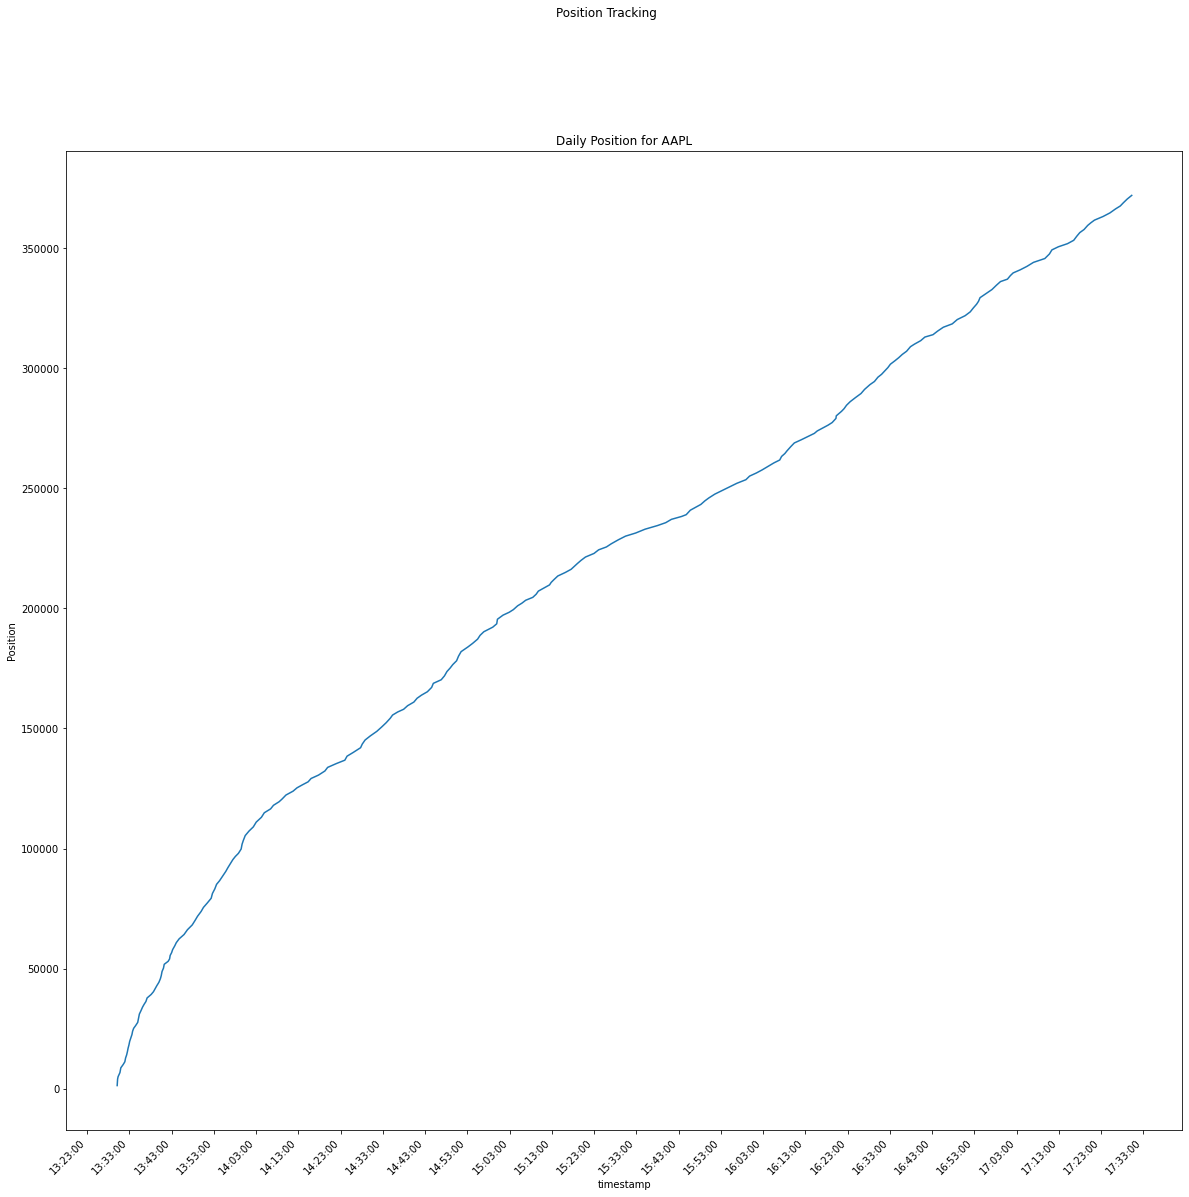

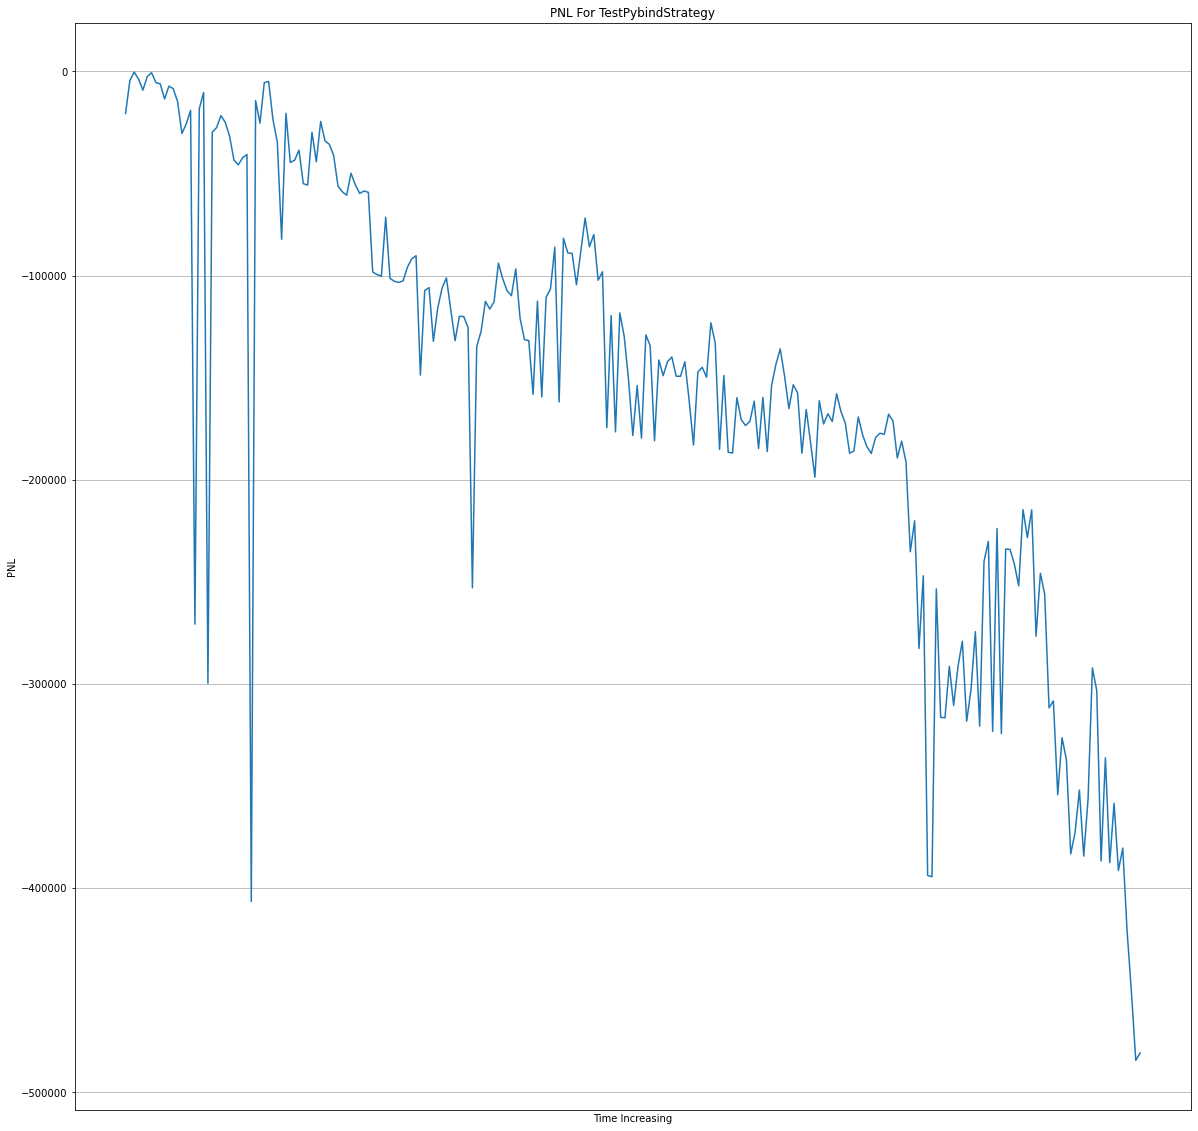

In [3]:
# Do data viz here
from position import plotPositions
from graphPNL import graphPNL

plotPositions()
graphPNL()

